# LSTM Example for Time Series prediction with Sine Wave

In [338]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [339]:
#Creating sine wave 
x = np.linspace(0,50,501)
y = np.sin(x)

In [340]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [341]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

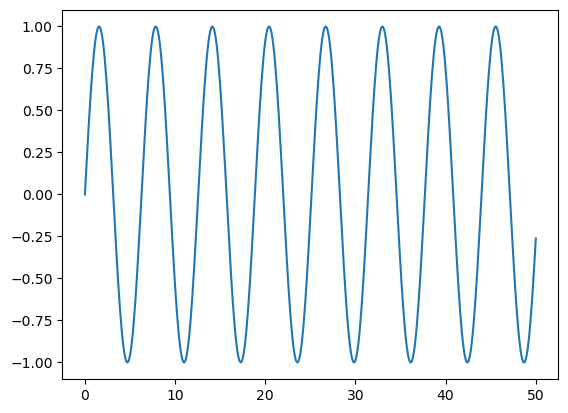

In [342]:
plt.plot(x,y)

In [343]:
#Create a data frame
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [344]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Using LSTM with train, test samples

In [407]:
# Train/Test split (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)

In [408]:
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [409]:
len(train)

400

In [410]:
len(test)

101

In [411]:
#Scale data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [412]:
#Create sequences with corresponding successive number to be prodicted
length = 50 #Using 50 for lendth to catch seasonality in data
batch_size = 1  # Can be any, but 1 is easier for future prediction

train_gen = TimeseriesGenerator(train_scaled, train_scaled,
                                length=length, batch_size=batch_size)

test_gen = TimeseriesGenerator(test_scaled, test_scaled,
                               length=length, batch_size=batch_size)

In [413]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_gen, epochs=10, verbose=1)

Epoch 1/10
350/350 [==============================] - 4s 9ms/step - loss: 0.0412
Epoch 2/10
350/350 [==============================] - 3s 10ms/step - loss: 4.3703e-05
Epoch 3/10
350/350 [==============================] - 3s 9ms/step - loss: 0.0011
Epoch 4/10
350/350 [==============================] - 3s 9ms/step - loss: 1.0565e-04
Epoch 5/10
350/350 [==============================] - 3s 9ms/step - loss: 1.3287e-04
Epoch 6/10
350/350 [==============================] - 3s 9ms/step - loss: 1.9624e-05
Epoch 7/10
350/350 [==============================] - 3s 9ms/step - loss: 1.1934e-04
Epoch 8/10
350/350 [==============================] - 3s 9ms/step - loss: 4.2219e-05
Epoch 9/10
350/350 [==============================] - 3s 9ms/step - loss: 8.7048e-04
Epoch 10/10
350/350 [==============================] - 3s 9ms/step - loss: 2.1657e-05


In [414]:
#Make pedictions on test sample
test_preds_scaled = model.predict(test_gen)
test_actual_scaled = test_scaled[length:]

# Inverse transform
test_preds = scaler.inverse_transform(test_preds_scaled)
test_actual = scaler.inverse_transform(test_actual_scaled)

51/51 [==============================] - 0s 2ms/step


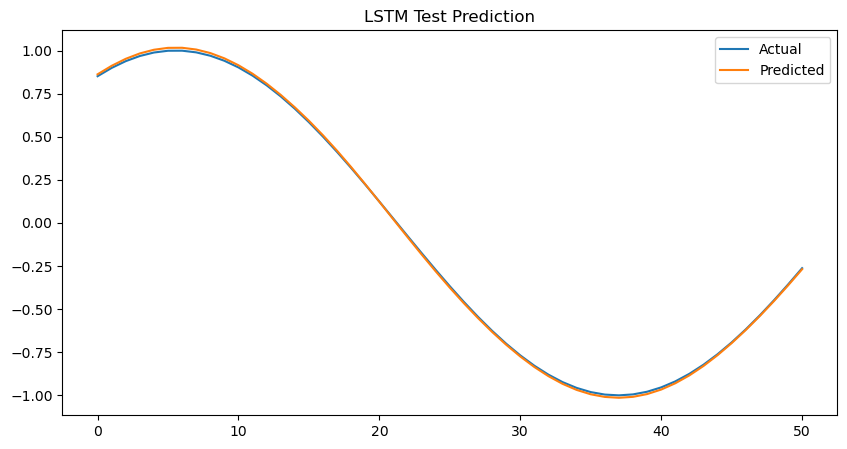

In [415]:
#Plot results
plt.figure(figsize=(10, 5))
plt.plot(test_actual, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.title('LSTM Test Prediction')
plt.legend()
plt.show()

# Using LSTM with earlystoping based on validation loss

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor="val_loss",patience=2)

In [ ]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

In [ ]:
train_size

In [ ]:
val_size

In [ ]:
train = df.iloc[:train_size]
valid = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

In [ ]:
#Scaling data
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

In [ ]:
scaled_train = scaler.transform(train)
scaled_valid = scaler.transform(valid)
scaled_test = scaler.transform(test)

In [ ]:
length=50
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator=TimeseriesGenerator(scaled_valid,scaled_valid,length=length,batch_size=1)
test_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

In [ ]:
predictions_scaled = model.predict(test_generator)
true_scaled = scaled_test[length:]  # Align with output

# Inverse transform both
predictions = scaler.inverse_transform(predictions_scaled)
true_values = scaler.inverse_transform(true_scaled)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(true_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("LSTM Forecast (batch_size=1)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Forecasting future time steps

In [ ]:
forecast=[]

first_eval_batch=scaled_test[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(25):
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#remove first item from the batch and append new prediction at the end

In [ ]:
forecast=scaler.inverse_transform(forecast)

In [ ]:
25*0.1

In [ ]:
forecast_index=np.arange(50.1,52.6,step=0.1)

In [ ]:
len(forecast_index)

In [ ]:
len(forecast)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index,df["Sine"],label='Sine')
plt.plot(forecast_index,forecast,label='Future Forecast')
plt.title("Future Forecast with LSTM")
plt.legend()
plt.show()